# Wine Case Analysis: *Wine Spectator*'s Top 100 Wines, 1988-2020
List available online on *Wine Spectator*'s [Top 100 Lists web site](https://top100.winespectator.com/lists/).

## File Setup

In [224]:
# import and initialize main python libraries
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import bar_chart_race as bcr
import seaborn as sns

# import libraries for file navigation
import os
import shutil
import glob
from pandas_ods_reader import read_ods

# import other packages
from scipy import stats
from sklearn import linear_model

# import geo packages
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

# import Geopy packages
import geopy
from geopy.geocoders import Nominatim

In [225]:
# initialize vizualization set
sns.set(style="whitegrid", palette="colorblind", color_codes=True)
sns.mpl.rc("figure", figsize=(10, 6))

# Jupyter Notebook
%matplotlib inline

## Dataframe Exploration

In [226]:
# Note: save CSV files in UTF-8 format to preserve special characters.
df_Wine = pd.read_csv('./Wine_Hier00.csv')
df_GeoCache = pd.read_csv('./GeoCache.csv')
df_Flag = pd.read_csv('./emoji_list.csv')

In [227]:
df_Wine.shape

(3301, 25)

In [228]:
df_Wine.dtypes

Review_Year           float64
Rank                   object
Vintage                object
Score                 float64
Price                  object
Winemaker              object
Wine                   object
Wine_Style             object
Grape_Blend            object
Blend_List             object
Geography              object
Cases_Made            float64
Cases_Imported        float64
Reviewer               object
Drink_now             float64
Best_Drink_from       float64
Best_Drink_Through    float64
Review                 object
Hierarchy              object
Address                object
loc                    object
point                  object
lat                   float64
long                  float64
altitude              float64
dtype: object

In [229]:
# CSV of wines is retaining a blank row at the end of the dataset. Remove the last row to prevent data type errors.

# number of rows to drop
n = 1

df_Wine.drop(df_Wine.tail(n).index, inplace = True)
df_Wine.shape

(3300, 25)

In [230]:
# Review_Year
# Convert Review_Year from float to int
df_Wine['Review_Year'] = df_Wine['Review_Year'].astype(int)

In [231]:
df_GeoCache.shape

(1224, 8)

In [232]:
df_Flag.shape

(19, 3)

In [233]:
df_Wine.sample(10)

,Review_Year,Rank,Vintage,Score,Price,Winemaker,Wine,Wine_Style,Grape_Blend,Blend_List,...,Best_Drink_from,Best_Drink_Through,Review,Hierarchy,Address,loc,point,lat,long,altitude
1035,2010,36,2006,94.0,70,Zenato,Amarone della Valpolicella Classico,Red,Amarone della Valpolicella,NaN,...,2011.0,NaN,Wonderful aromas of black licorice and blueber...,Hierarchy_00,Italy,Italia,"(42.6384261, 12.674297, 0.0)",42.638426,12.674297,0.0
375,2017,76,2015,96.0,69,Louis Chèze,Condrieu Pagus Luminis,White,Viognier,NaN,...,2017.0,2022.0,"This has power, with a large core of creamed p...",Hierarchy_00,France,France,"(46.603354, 1.8883335, 0.0)",46.603354,1.888333,0.0
3007,1990,8,1988,98.0,24,Joh. Jos. Prüm,Riesling Spätlese Mosel-Saar-Ruwer Wehlener So...,White,Riesling,NaN,...,NaN,NaN,NaN,Hierarchy_00,Germany,Deutschland,"(51.0834196, 10.4234469, 0.0)",51.083420,10.423447,0.0
417,2016,18,2012,93.0,25,Condado de Haza,Ribera del Duero,Red,Tempranillo,NaN,...,2016.0,2024.0,"This rich red shows a deep core of plum, bramb...",Hierarchy_00,Spain,España,"(39.3260685, -4.8379791, 0.0)",39.326068,-4.837979,0.0
792,2013,93,2009,92.0,42,A.A. Badenhorst Family,Swartland,Red,Blend,"Shiraz, Mourvèdre, Grenache and Cinsault",...,2014.0,2018.0,"Densely packed, offering boysenberry, red curr...",Hierarchy_00,South Africa,South Africa,"(-28.8166236, 24.991639, 0.0)",-28.816624,24.991639,0.0
3125,1989,26,1986,94.0,30,Cuvaison,Cabernet Sauvignon Napa Valley,Red,Cabernet Sauvignon,NaN,...,1989.0,NaN,"Ripe and opulent, with remarkable power on a s...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
1055,2010,56,2007,91.0,21,Concha y Toro,Cabernet Sauvignon Puente Alto Marqués de Casa...,Red,Cabernet Sauvignon,NaN,...,2010.0,2012.0,"Rock-solid, with dark currant, fig and blackbe...",Hierarchy_00,Chile,Chile,"(-31.7613365, -71.3187697, 0.0)",-31.761336,-71.318770,0.0
2688,1994,89,NV,90.0,16,Roederer Estate,Brut Anderson Valley,Sparkling,Blend,60% Chardonnay and 40% Pinot Noir,...,NaN,NaN,"A spicy California sparkler, with ripe pear, h...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
1636,2004,37,2001,94.0,65,Château Cos-d'Estournel,St.-Estèphe,Red,Blend,Bordeaux Blend Red,...,2008.0,NaN,Wonderful spice and currant aromas to this you...,Hierarchy_00,France,France,"(46.603354, 1.8883335, 0.0)",46.603354,1.888333,0.0
2652,1994,53,1992,92.0,28,Kumeu River,Chardonnay Kumeu,White,Chardonnay,NaN,...,NaN,NaN,"Big and rich, putting it all together: opulent...",Hierarchy_00,New Zealand,New Zealand / Aotearoa,"(-41.5000831, 172.8344077, 0.0)",-41.500083,172.834408,0.0


## Data Type Cleanup

In [234]:
df_Wine.dtypes

Review_Year             int64
Rank                   object
Vintage                object
Score                 float64
Price                  object
Winemaker              object
Wine                   object
Wine_Style             object
Grape_Blend            object
Blend_List             object
Geography              object
Cases_Made            float64
Cases_Imported        float64
Reviewer               object
Drink_now             float64
Best_Drink_from       float64
Best_Drink_Through    float64
Review                 object
Hierarchy              object
Address                object
loc                    object
point                  object
lat                   float64
long                  float64
altitude              float64
dtype: object

## Pivot data for visualization

In [235]:
# Average Score by Wine Style - All Years
df_Wine_Count = pd.DataFrame({'Count' : df_Wine.groupby(['Wine_Style', 'Address', 'Review_Year'])['Score'].count()}).reset_index()
df_Wine_Count.head()

,Wine_Style,Address,Review_Year,Count
0,Dessert & Fortified,Australia,1989,1
1,Dessert & Fortified,Australia,1994,1
2,Dessert & Fortified,Australia,1996,1
3,Dessert & Fortified,Canada,2008,1
4,Dessert & Fortified,France,1988,3


### Visualization

In [236]:
# set palette and dimensions
palette = sns.color_palette('colorblind')

In [237]:
# define a function to graph summary data

def summary_barplot(country):
    
    # pivot the data to facilitate bar chart race
    df = df_Wine_Count[(df_Wine_Count.Address == country)].pivot(index = 'Review_Year', columns = 'Wine_Style', values = 'Count')
    
    # replace 'NaN' results in chart with 0 to facilitate graphing
    df.fillna(value = 0, inplace = True)
    
    #append empty columns as necessary to maintain dataframe structure
    styles = df_Wine_Count.Wine_Style.unique()
    
    for style in styles:
        colcheck = style in df
        if colcheck == False:
            df[style] = 0
    
    colorder = ['Dessert & Fortified', 'Red', 'Rosé | Rosado', 'Sparkling', 'White']
    df = df.reindex(columns = colorder)
    
    # pivot across all wine styles to find max count for country across review years
    df_t = pd.DataFrame({'Total' : df_Wine_Count.groupby(['Address', 'Review_Year'])['Count'].sum()}).reset_index()
    
    maxcount = df_t['Total'].max()
    
    # Number of values to plot on the y axis
    A = np.array( df.index )
    N = len(A)
    
    dim = (10, (15 * (N / 33)))
    fig, ax = plt.subplots(figsize = dim)

    # x locations for the groups
    ind = np.arange(N)
    
    width = 0.35
    
    d5 = df['Dessert & Fortified']
    d4 = df['Dessert & Fortified'] + df['Red']
    d3 = df['Dessert & Fortified'] + df['Red'] + df['Rosé | Rosado']
    d2 = df['Dessert & Fortified'] + df['Red'] + df['Rosé | Rosado'] + df['Sparkling']
    d1 = df['Dessert & Fortified'] + df['Red'] + df['Rosé | Rosado'] + df['Sparkling'] + df['White']
    
    # Plot the totals:
    # White
    p5 = plt.barh(ind, d1, width)
    # Sparkling
    p4 = plt.barh(ind, d2, width)
    # Rosé | Rosado
    p3 = plt.barh(ind, d3, width)
    # Red
    p2 = plt.barh(ind, d4, width)
    # Dessert & Fortified
    p1 = plt.barh(ind, d5, width)
  
    plt.xlabel('Count')
    plt.xticks(np.arange(0, maxcount, 5))

    plt.yticks(ind, np.array(df.index))
    
    plt.title(country + '\nCount of Wine Spectator Scores in Top 100 List by Review Year by Style')
    
    plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]
                #
               ), ('Dessert & Fortified', 'Red', 'Rosé | Rosado', 'Sparkling', 'White'
                   #
                  ))
    
    fig.savefig('./images/barh_count_by_style_by_reviewyear_' + country + '.png')


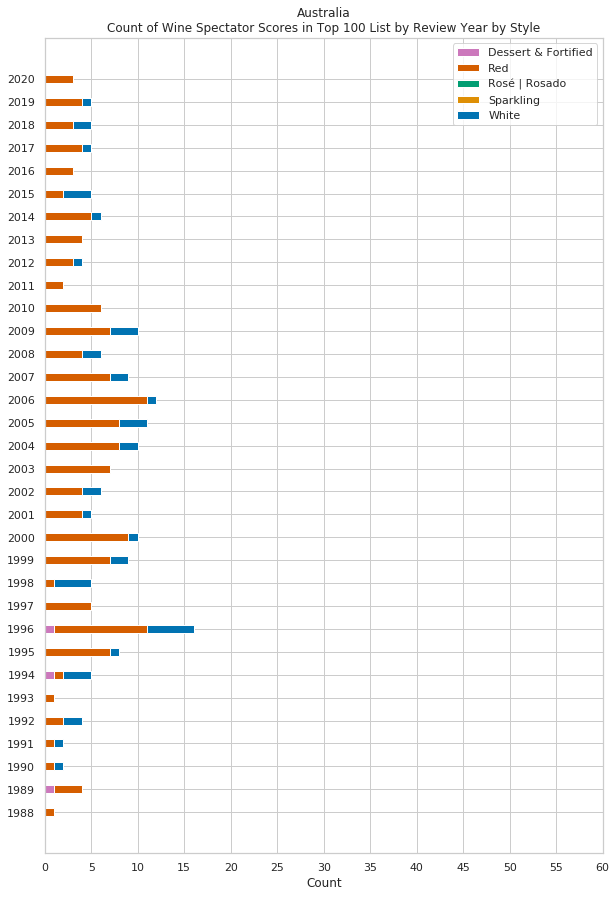

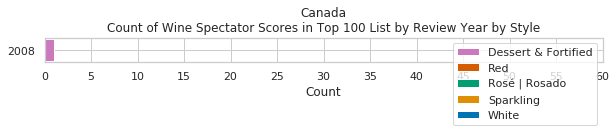

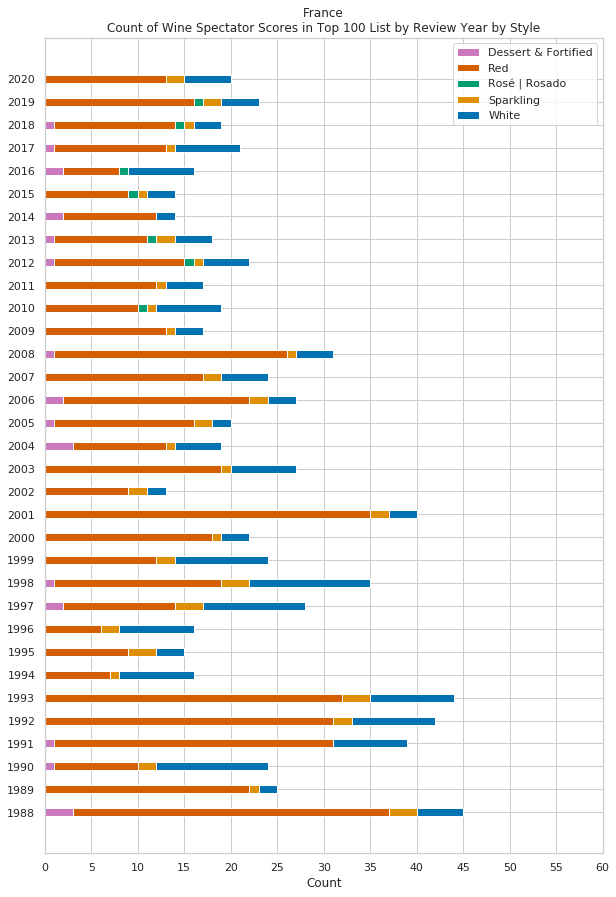

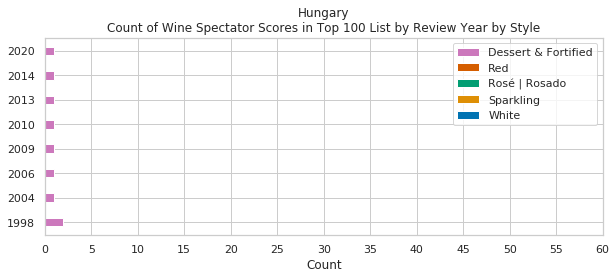

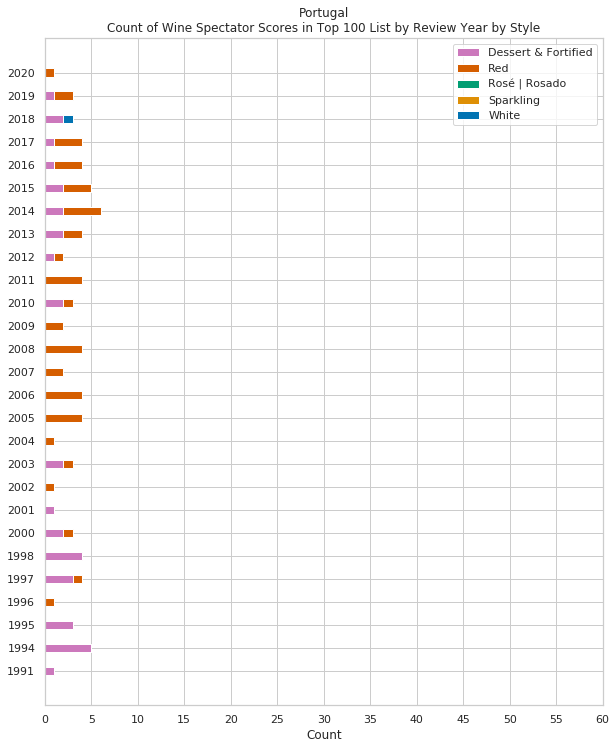

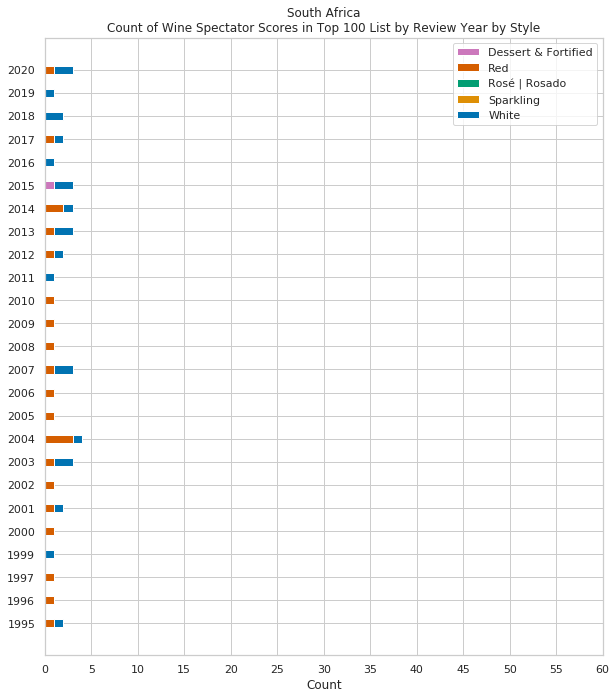

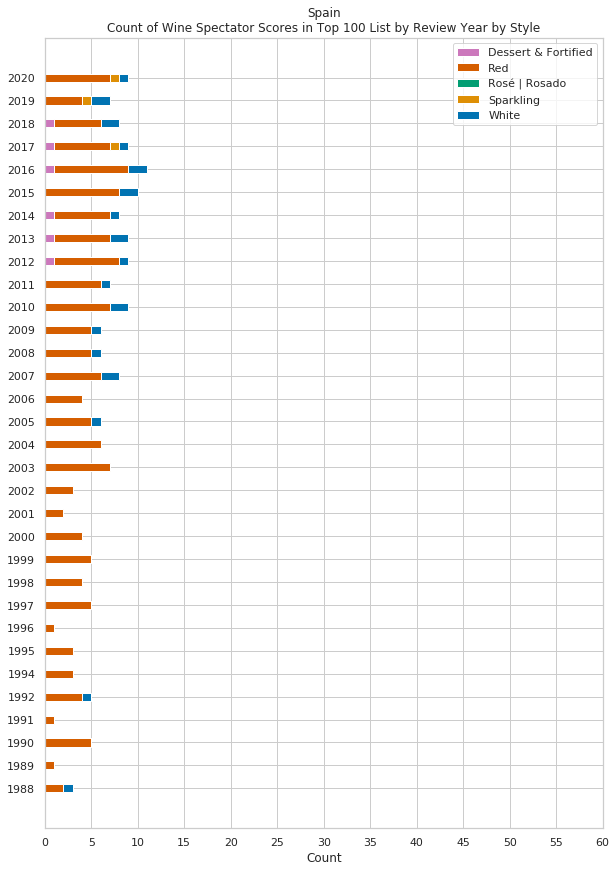

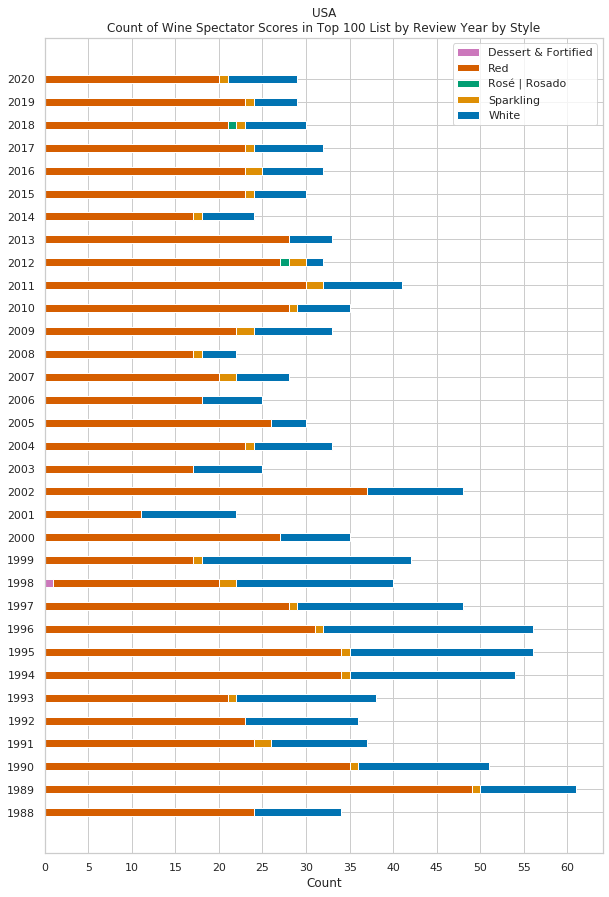

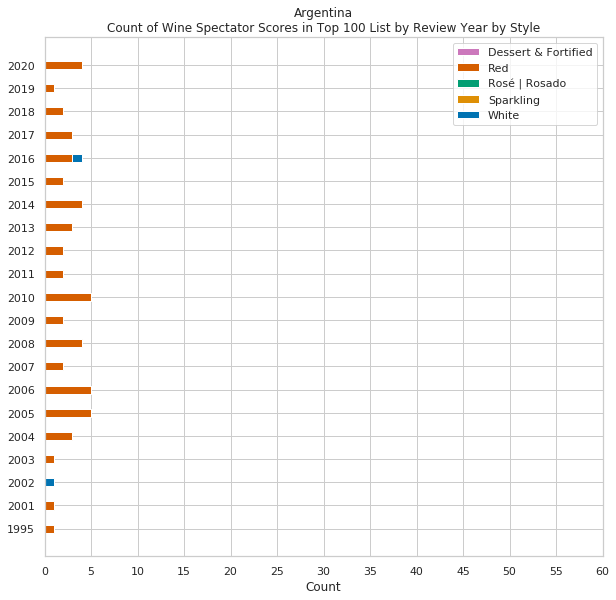

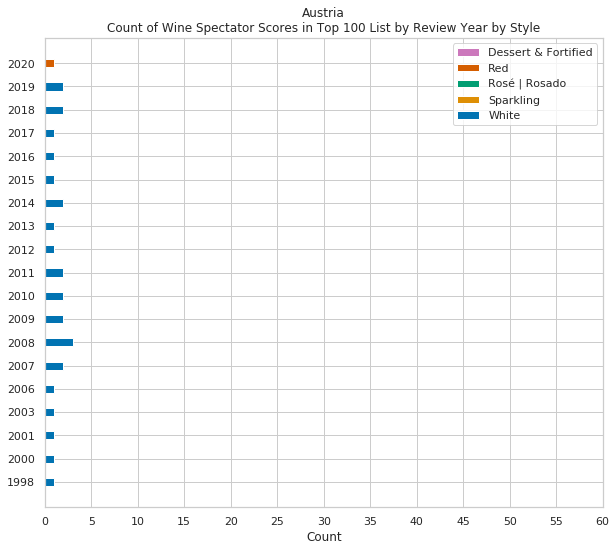

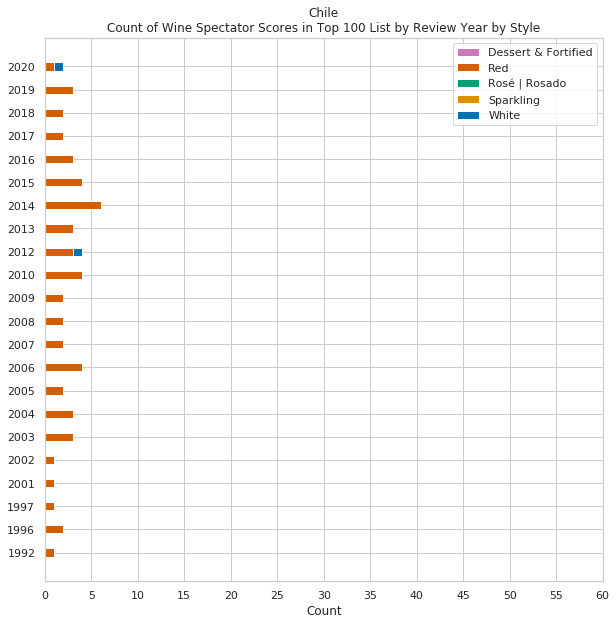

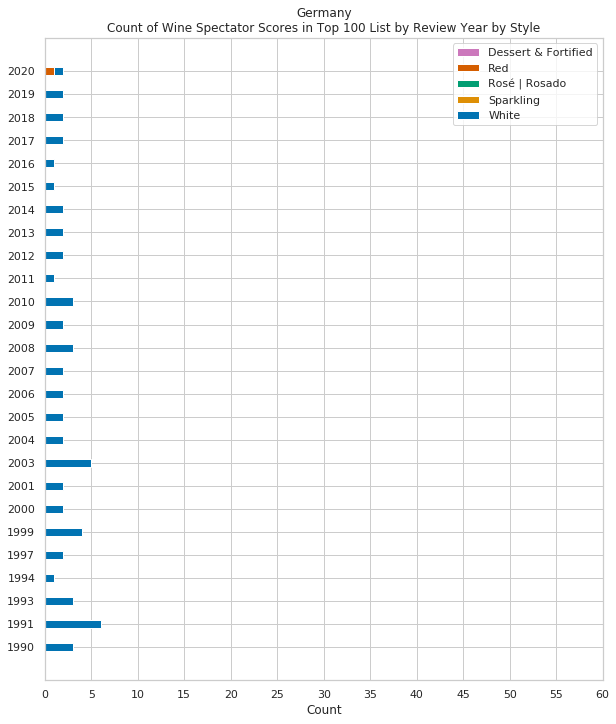

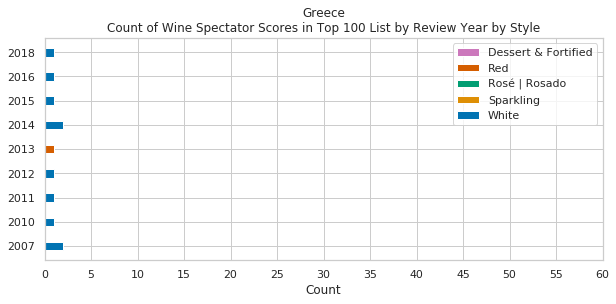

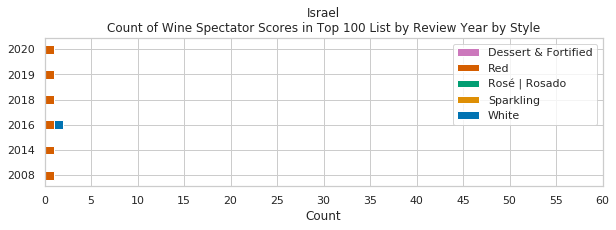

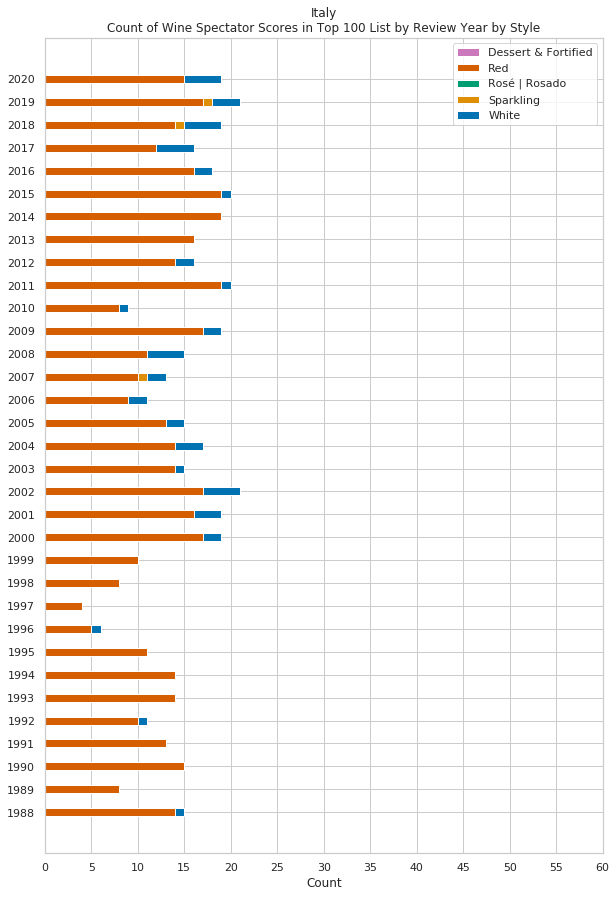

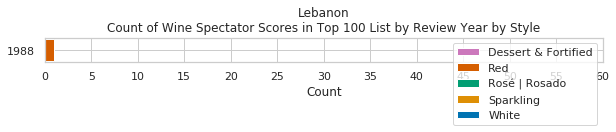

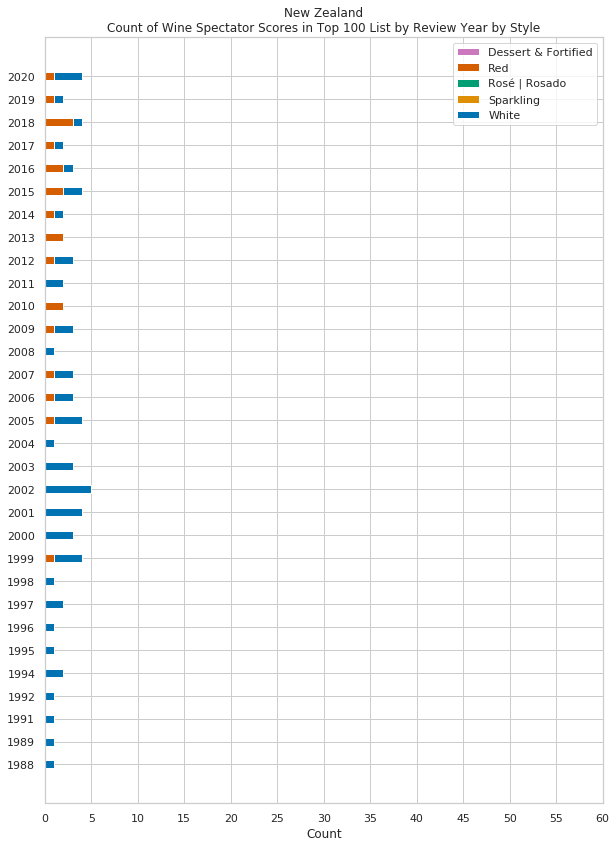

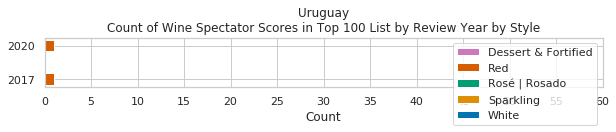

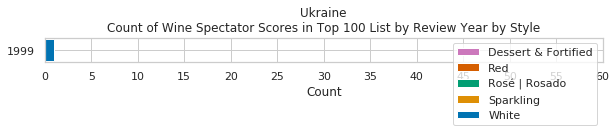

In [238]:
countries = df_Wine_Count.Address.unique()

for country in countries:
    summary_barplot(country)